In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"
city_data_to_load = pd.read_csv(city_data_to_load)
city_data_to_load.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data_to_load = pd.read_csv(ride_data_to_load)
ride_data_to_load.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
city_ride_merge = pd.merge(city_data_to_load,ride_data_to_load,on="city")
city_ride_merge.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [6]:
average_fare= city_ride_merge.groupby(["city"]).mean()["fare"]
average_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [7]:
total_rides=city_ride_merge.groupby(["city"]).count()["ride_id"]
total_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [8]:
drivers_by_city=city_ride_merge.groupby("city")["driver_count"].mean()
drivers_by_city.sum()

2973

In [9]:
city_type = city_data_to_load.set_index(['city'])['type']
city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [10]:
city_ride_data = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": drivers_by_city,
                 "City Type": city_type
})
city_ride_data

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural
Brandonfort,35.437368,19,10,Suburban
Carriemouth,28.314444,27,52,Urban
Christopherfurt,24.501852,27,41,Urban
Colemanland,30.894545,22,23,Suburban
Davidfurt,31.995882,17,23,Suburban


In [11]:
urban = city_ride_data.loc[city_ride_data["City Type"]== "Urban"]

suburban = city_ride_data.loc[city_ride_data["City Type"]== "Suburban"]

rural = city_ride_data.loc[city_ride_data["City Type"]== "Rural"]

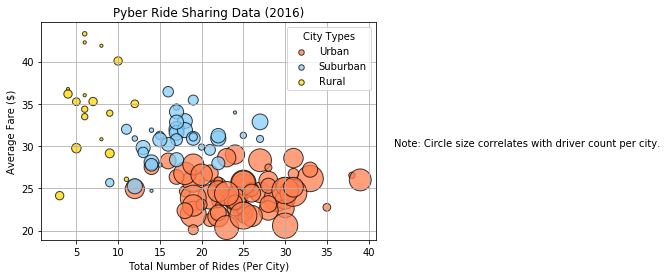

In [12]:
urban_plt = plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "coral", edgecolors="black", s = urban["Number of Drivers"]*10, label = "Urban", alpha = .75)
suburban_plt = plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*10, label = "Suburban", alpha = .75)
rural_plt = plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "gold", edgecolors = "black", s = rural["Number of Drivers"]*10, label = "Rural", alpha = .75)

#Add title, x axis label and y axis label.
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(43, 30,"Note: Circle size correlates with driver count per city.")
plt.grid()
lgnd = plt.legend(title = 'City Types')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.savefig("ride_share_bubble.png", bbox_inches="tight")
plt.show()

In [14]:
fare_by_type_p = city_ride_merge.groupby(["type"])["fare"].sum()

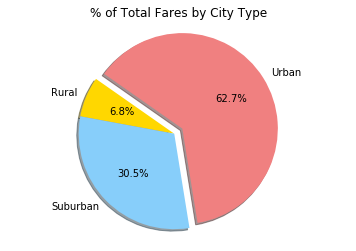

In [16]:
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)

plt.pie(fare_by_type_p, labels = fare_by_type_p.index, colors = colors, explode = explode, 
        autopct = "%1.1f%%",shadow = True, startangle = 145)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.savefig("fare_by_type_pie.png")
plt.show()

In [17]:
rides_by__type = city_ride_merge.groupby(["type"])["ride_id"].count()
rides_by__type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

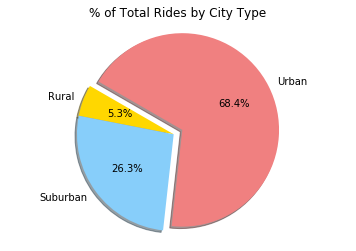

In [18]:
explode = (0,0, 0.1)

plt.pie(rides_by__type, labels = rides_by__type.index, colors = colors, explode = explode, 
        autopct = "%1.1f%%",shadow = True, startangle = 150)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
#Show the chart.
plt.savefig("rides_by_type_pie.png")
plt.show()

In [19]:
drivers_by_type_p = pd.DataFrame(city_ride_data.groupby(by='City Type')['Number of Drivers'].sum())
drivers_by_type_p

,Number of Drivers
City Type,
Rural,78
Suburban,490
Urban,2405


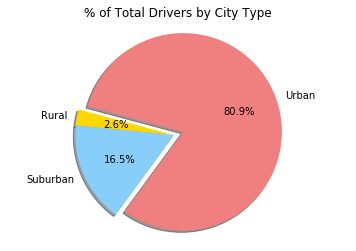

In [21]:
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [drivers_by_type_p['Number of Drivers']['Rural']/drivers_by_type_p['Number of Drivers'].sum(),\
               drivers_by_type_p['Number of Drivers']['Suburban']/drivers_by_type_p['Number of Drivers'].sum(),\
               drivers_by_type_p['Number of Drivers']['Urban']/drivers_by_type_p['Number of Drivers'].sum()]
explode = (0, 0, 0.1)

#create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.1f%%', startangle=165,colors=colors, explode = explode,shadow = True)
ax1.axis('equal')
plt.title("% of Total Drivers by City Type")
plt.savefig("drivers_by_type_pie.png")
plt.show()